# Modeling Classical Models

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [6]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

You can use the built-in *help()* function in Python to get information about any module, class, or function.

In [3]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    an implicit,  MATLAB-like, way of plotting.  It also opens figures on your
    screen, and acts as the figure GUI manager.
    
    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The explicit object-oriented API is recommended for complex plots, though
    pyplot is still usually used to create the figure and often the axes in the
    figure. See `.pyplot.figure`, `.pyplot.subplots`, and
    `.pyplot.subplot_mosaic` to create figures, and
    :doc:`Axes API </api/axes_api>` for the plotting methods on an Axes::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.

In [5]:
        # import numpy as np
        # import matplotlib.pyplot as plt

        # x = np.arange(0, 5, 0.1)
        # y = np.sin(x)
        # plt.plot(x, y)

The *dir()* function provides a list of attributes and methods of any object. This can be useful to see what functions are available in a module.

In [11]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'Text',
 'TickHelper',
 'Widget',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_copy_docstring_and_deprecators',
 '_docstring',
 '_draw_all_if_interactive',
 '_get_backend_mod',
 '_get_pyplot_commands

You can also access the documentation string of a specific function or class by using the *__doc__* attribute.

In [13]:
print(StandardScaler.__doc__)

Standardize features by removing the mean and scaling to unit variance.

    The standard score of a sample `x` is calculated as:

        z = (x - u) / s

    where `u` is the mean of the training samples or zero if `with_mean=False`,
    and `s` is the standard deviation of the training samples or one if
    `with_std=False`.

    Centering and scaling happen independently on each feature by computing
    the relevant statistics on the samples in the training set. Mean and
    standard deviation are then stored to be used on later data using
    :meth:`transform`.

    Standardization of a dataset is a common requirement for many
    machine learning estimators: they might behave badly if the
    individual features do not more or less look like standard normally
    distributed data (e.g. Gaussian with 0 mean and unit variance).

    For instance many elements used in the objective function of
    a learning algorithm (such as the RBF kernel of Support Vector
    Machines or the L1 

## Load the data

In [7]:
# Read in file from folder structure--this is the cleaned version (still has null values)
filename = '/content/drive/MyDrive/TAs/ML/MLModels/titanic-cleaned.csv'
df = pd.read_csv(filename)

In [11]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.86,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.08,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.13,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.07,NaN,C


In [21]:
df = df.set_index('PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [18]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
Siblings or Spouses,0
Parents or Children,0
Ticket,0
Fare,0


In [12]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
Siblings or Spouses,int64
Parents or Children,int64
Ticket,object
Fare,float64


In [22]:
# Inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survived             891 non-null    int64  
 1   Pclass               891 non-null    int64  
 2   Name                 891 non-null    object 
 3   Sex                  891 non-null    object 
 4   Age                  714 non-null    float64
 5   Siblings or Spouses  891 non-null    int64  
 6   Parents or Children  891 non-null    int64  
 7   Ticket               891 non-null    object 
 8   Fare                 891 non-null    float64
 9   Cabin                204 non-null    object 
 10  Embarked             889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [36]:
# Compute correlation matrix for numeric columns only
correlation_matrix = df.corr(numeric_only=True)
# print(correlation_matrix)

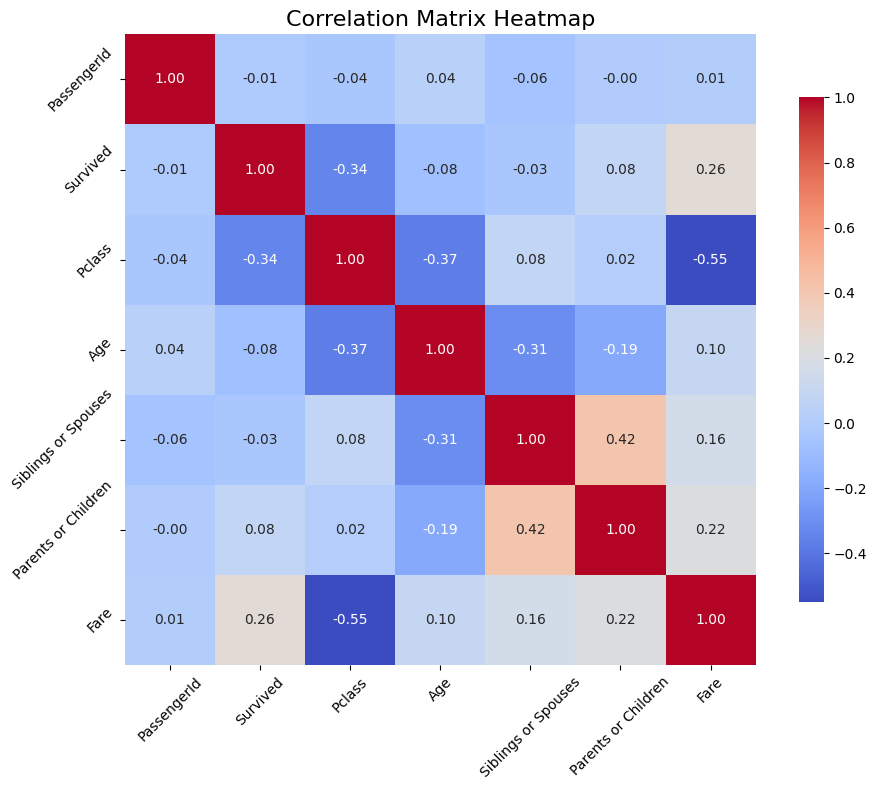

In [37]:
# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})

# Set title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
# df.describe()
## df.isnull().sum()
### df.dtypes

## Using Python to Build a Confusion Matrix

<img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1687388610__Capture.PNG" width="50%">  
This lesson uses a version of the [Titanic dataset](https://drive.google.com/file/d/1-6dAWrURpGM-T_bix1Sfg8AWkhT42So6/view?usp=sharing) that has been cleaned for ML. It still contains missing values that will be imputed by our preprocessor. The usual goal of this dataset is to predict passenger survival based on characteristics like gender, age, and passenger class (pclass). In the dataset, 1 means the passenger survived, and 0 means they did not.

In this case, our positive class is 1 (‘Survived,’) and our negative class is 0 (‘Died.’) This is a classification problem because the target is categorical. Since the target only has 2 classes, this is considered a binary classification task.

In [32]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings or Spouses',
       'Parents or Children', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
# Drop irrelevant and high cardinality features
cols_drop = ['Ticket', 'Cabin']
# Create features matrix and target vector
X = df.drop(columns = [*cols_drop, 'Survived'])
y = df['Survived']
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [16]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [17]:
X

,PassengerId,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.28,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.93,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.10,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.05,S
...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C


In [39]:
X.head()

,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Fare,Embarked
PassengerId,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.28,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.93,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.10,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.05,S


In [19]:
X.dtypes

,0
PassengerId,int64
Pclass,int64
Name,object
Sex,object
Age,float64
Siblings or Spouses,int64
Parents or Children,int64
Fare,float64
Embarked,object


In [20]:
# Categorical Preprocessing Pipeline
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "Missing")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

OneHotEncoder Columns: Index(['Name', 'Sex', 'Embarked'], dtype='object')


In [21]:
# Numerical Prepprocessing Pipeline
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)

Numeric Columns: Index(['PassengerId', 'Pclass', 'Age', 'Siblings or Spouses',
       'Parents or Children', 'Fare'],
      dtype='object')


In [22]:
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple], verbose_feature_names_out=False)

In [23]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['PassengerId', 'Pclass', 'Age', 'Siblings or Spouses',
       'Parents or Children', 'Fare'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Name', 'Sex', 'Embarked'], dtype='object'))],
                  verbose_feature_names_out=False)

In [24]:
# Instantiate a default decision tree
dec_tree_class =DecisionTreeClassifier(random_state = 42)
# Make a pipeline to scale the data and fit a model
dec_tree_pipe = make_pipeline(preprocessor, dec_tree_class)
# Fit the model on the training data
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['PassengerId', 'Pclass', 'Age', 'Siblings or Spouses',
       'Parents or Children', 'Fare'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Name', 'Sex', 'Embarked'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

**Obtain Predictions and Evaluate the Model**  
For classification problems, we will use different metrics than we used for regression tasks. For now, we will obtain accuracy, which is just the ratio of values that were predicted correctly.

In [25]:
# Define the predicted values
y_pred_train = dec_tree_pipe.predict(X_train)
y_pred_test = dec_tree_pipe.predict(X_test)

In [26]:
# Obtain the accuracy score
train_acc = round(accuracy_score(y_pred_train, y_train), 3)
test_acc = round(accuracy_score(y_pred_test, y_test), 3)
# Print the results
print(f'Training accuracy : {train_acc}.')
print(f'Testing accuracy  : {test_acc}.')

Training accuracy : 1.0.
Testing accuracy  : 0.807.


We can see that the default model is quite overfit. Ultimately, we would try to improve the model by hypertuning, but for this lesson, we are going to show how to enhance our evaluation of a classification model by creating a confusion matrix.

**Create a Confusion Matrix**  
First, we will obtain the most basic version of a confusion matrix using confusion_matrix().

In [59]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[117,  17],
       [ 24,  65]])

While the information is present, we can improve the readability somewhat by converting the array to Pandas Dataframe.

In [60]:
# Convert confusion matrix to dataframe
cm_df = pd.DataFrame(cm)
cm_df

,0,1
0,117,17
1,24,65


An even better option is to create a heatmap of the confusion matrix. We can use the ConfusionMatrixDisplay class to display our confusion matrix colorfully and attractively. This is great for reporting. Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) to see more options.

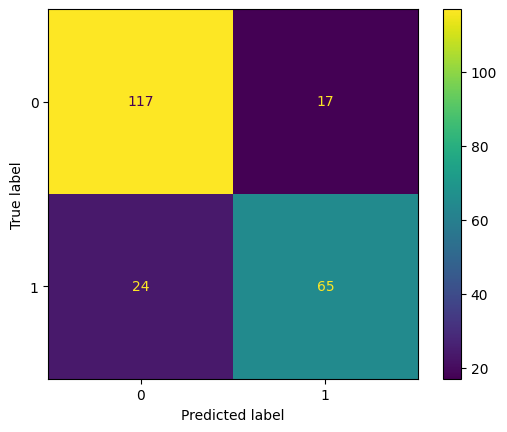

In [61]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test);

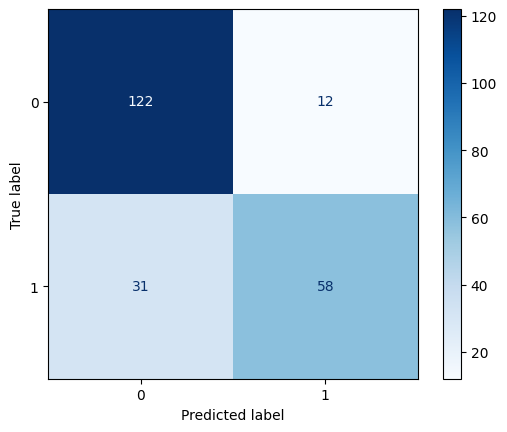

In [33]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues');

**Interpreting the confusion matrix**

We can see that we had a total of (107+27+28+61) 223 passengers in the test set.

**Recall** that, in this case, the positive class is "Survived," and the negative class is "Died."

**True Negatives**: 107 passengers who actually died were predicted correctly (as died) by the model.

**True Positives**: 61 passengers who actually survived were predicted correctly (as survived) by the model.

Note that the True Negatives and True Positives are accurate predictions. Our accuracy metric from above (.753) is equivalent to (107+61)/223.

**False Negatives**: 28 passengers who actually survived were predicted incorrectly (as died) by the model. (Type 1 Error)

**False Positives**: 27 passengers who actually died were predicted incorrectly (as survived) by the model. (Type 2 Error)

### Normalized Values
You can also normalize values in the cells to show either the percentages of the true values that the model predicted correctly or incorrectly or the percentages of the predicted values that were correct or incorrect with the normalize argument. You can normalize along the true axis by setting normalize=’true’ or the predicted axis with normalize=’pred.’ Here we chose to normalize on True.

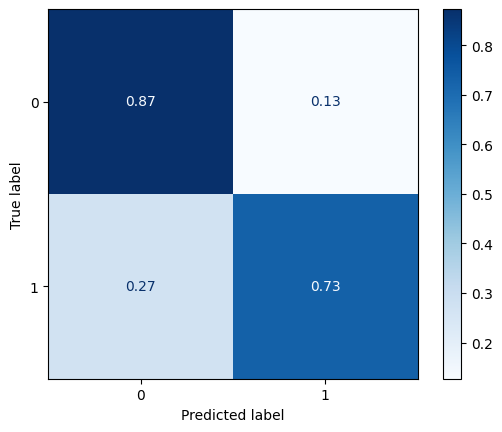

In [79]:
# Plot the confusion matrix with ratios
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues', normalize='true');

# Evaluating with more metrics

**Accuracy**

In [80]:
accuracy_sk = accuracy_score(y_test, y_pred_test)
accuracy_sk

0.8161434977578476

**Recall**

In [81]:
from sklearn.metrics import recall_score
recall_sk = recall_score(y_test, y_pred_test)
recall_sk

0.7303370786516854

**Precision**

In [82]:
from sklearn.metrics import precision_score
precision_sk = precision_score(y_test, y_pred_test)
precision_sk

0.7926829268292683

**F1-Score**

In [83]:
from sklearn.metrics import f1_score
f1_sk = f1_score(y_test, y_pred_test)
f1_sk

0.7602339181286549

### Classification Report
Classification_report can be imported from skearn.metrics. Like the other metric functions, it requires y_true and y_pred.

It returns a string report that is intended to be printed by default.

Continue working in the notebook from the previous lesson.

In [84]:
from sklearn.metrics import classification_report
# Print the classification report for decision tree predictions of titanic survivorship
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       134
           1       0.79      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.81      0.82      0.81       223



# Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf_class = RandomForestClassifier(random_state=42)

In [87]:
rf_pipe = make_pipeline(preprocessor, rf_class)

In [88]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Age', 'Siblings or Spouses', 'Parents or Children', 'Fare'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Name', 'Sex', 'Embarked'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [89]:
# Define predicted values
y_pred_rf_test = rf_pipe.predict(X_test)

In [94]:
rf_test_acc = round(accuracy_score(y_pred_rf_test, y_test), 3)

In [93]:
print(f'Random Forest Testing accuracy: {rf_test_acc}.')

Random Forest Testing accuracy: 0.821.


In [95]:
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       134
           1       0.82      0.71      0.76        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



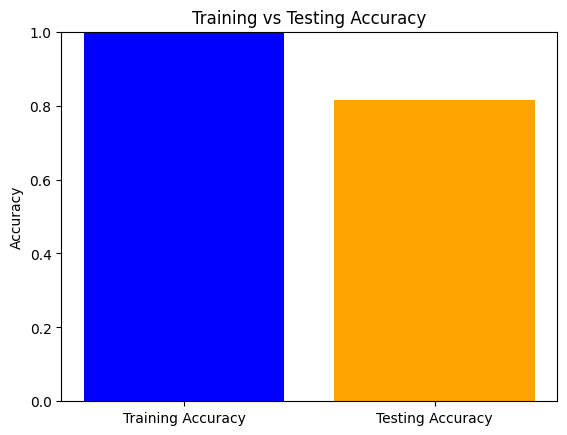

In [97]:
# Accuracy values
accuracies = [train_acc, test_acc]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.show()

## Plot Learning Curves

In [34]:
from sklearn.model_selection import learning_curve

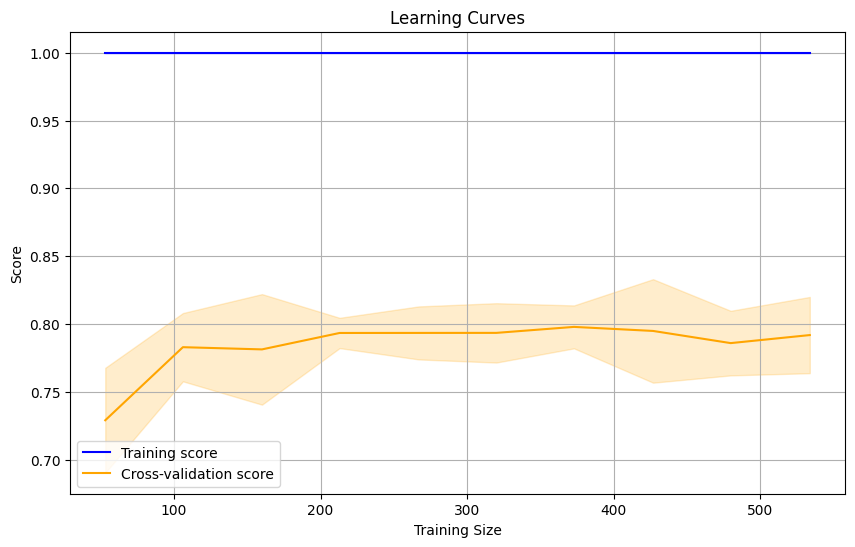

In [35]:
train_sizes, train_scores, test_scores = learning_curve(
    dec_tree_pipe, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)

test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='orange')

plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 color='blue', alpha=0.2)
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 color='orange', alpha=0.2)

plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

## Pruning the Tree

In [100]:
dec_tree_class = DecisionTreeClassifier(random_state=42, max_depth=5)

In [101]:
rf_class = RandomForestClassifier(random_state=42)
rf_pipe = make_pipeline(preprocessor, rf_class)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Age', 'Siblings or Spouses', 'Parents or Children', 'Fare'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Name', 'Sex', 'Embarked'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [102]:
y_pred_rf_test = rf_pipe.predict(X_test)

In [103]:
rf_test_acc = round(accuracy_score(y_pred_rf_test, y_test), 3)
print(f'Random Forest Testing accuracy: {rf_test_acc}.')

Random Forest Testing accuracy: 0.821.


In [104]:
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       134
           1       0.82      0.71      0.76        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



### More Evaluation metrics

#### Area Under the Receiver Operating Characteristic Curve (AUC-ROC)

In [122]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, dec_tree_pipe.predict_proba(X_test)[:, 1])
print(f'AUC-ROC Score: {auc_score}')

AUC-ROC Score: 0.8017357035049472


#### Matthews Correlation Coefficient (MCC)

In [123]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred_test)
print(f'Matthews Correlation Coefficient: {mcc}')

Matthews Correlation Coefficient: 0.6128971722915626


### Cohen’s Kappa

In [124]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred_test)
print(f'Cohen’s Kappa: {kappa}')

Cohen’s Kappa: 0.6115477758422909


#### Log Loss (Cross-Entropy Loss)

In [125]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, dec_tree_pipe.predict_proba(X_test))
print(f'Log Loss: {logloss}')

Log Loss: 6.626860040151584


# Feature Selection

### Homework

## Cross-validation

In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
# Perform cross-validation
cv_scores = cross_val_score(dec_tree_pipe, X_train, y_train, cv=5)

# Print the results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.80597015 0.81343284 0.75373134 0.84210526 0.81954887]
Mean Cross-Validation Score: 0.806957692739311


In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
models = {
    "Decision Tree": dec_tree_pipe,
    "Random Forest": make_pipeline(preprocessor, RandomForestClassifier(random_state=42)),
    "Logistic Regression": make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
}

results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    results[name] = {
        "Cross-Validation Scores": cv_scores,
        "Mean Cross-Validation Score": cv_scores.mean()
    }

for name, metrics in results.items():
    print(f"{name}:")
    print("  Cross-Validation Scores:", metrics["Cross-Validation Scores"])
    print("  Mean Cross-Validation Score:", metrics["Mean Cross-Validation Score"])
    print()

Decision Tree:
  Cross-Validation Scores: [0.80597015 0.81343284 0.75373134 0.84210526 0.81954887]
  Mean Cross-Validation Score: 0.806957692739311

Random Forest:
  Cross-Validation Scores: [0.79850746 0.86567164 0.80597015 0.79699248 0.84962406]
  Mean Cross-Validation Score: 0.8233531590169454

Logistic Regression:
  Cross-Validation Scores: [0.79850746 0.84328358 0.78358209 0.7443609  0.81203008]
  Mean Cross-Validation Score: 0.7963528223543934



## Ensemble models

To implement an ensemble of multiple models, you can use techniques like Voting Classifier or Stacking Classifier from Scikit-learn.

In [111]:
from sklearn.ensemble import VotingClassifier

In [112]:
dec_tree_class = DecisionTreeClassifier(random_state=42)
rf_class = RandomForestClassifier(random_state=42)
log_reg_class = LogisticRegression(max_iter=1000)

In [113]:
voting_clf = VotingClassifier(
    estimators=[
        ('decision_tree', dec_tree_class),
        ('random_forest', rf_class),
        ('logistic_regression', log_reg_class)
    ],
    voting='hard'
)

Use *voting = 'soft'* for probability-based voting

In [114]:
voting_pipe = make_pipeline(preprocessor, voting_clf)

In [115]:
voting_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Age', 'Siblings or Spouses', 'Parents or Children', 'Fare'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Miss...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Name', 'Sex', 'Embarked'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('votingclassifier',
                 VotingClassifier(estimators=[('decision_tree',
                                               DecisionTreeClassifier(random_state=42)),
                                              ('random_forest',
                                               RandomForestClassifier(random_state=42)),
                                              ('logistic_regression',
                                               LogisticRegression(max_iter=1000))]))])

In [116]:
y_pred_train_voting = voting_pipe.predict(X_train)
y_pred_test_voting = voting_pipe.predict(X_test)

In [117]:
train_acc_voting = round(accuracy_score(y_pred_train_voting, y_train), 3)
test_acc_voting = round(accuracy_score(y_pred_test_voting, y_test), 3)

In [118]:
# Print results
print(f'Voting Classifier Training accuracy : {train_acc_voting}.')
print(f'Voting Classifier Testing accuracy : {test_acc_voting}.')

Voting Classifier Training accuracy : 1.0.
Voting Classifier Testing accuracy : 0.83.


In [120]:
recall_voting = recall_score(y_test, y_pred_test_voting)
precision_voting = precision_score(y_test, y_pred_test_voting)
f1_voting = f1_score(y_test, y_pred_test_voting)

print(f'Recall: {recall_voting}')
print(f'Precision: {precision_voting}')
print(f'F1 Score: {f1_voting}')

Recall: 0.7303370786516854
Precision: 0.8227848101265823
F1 Score: 0.7738095238095238


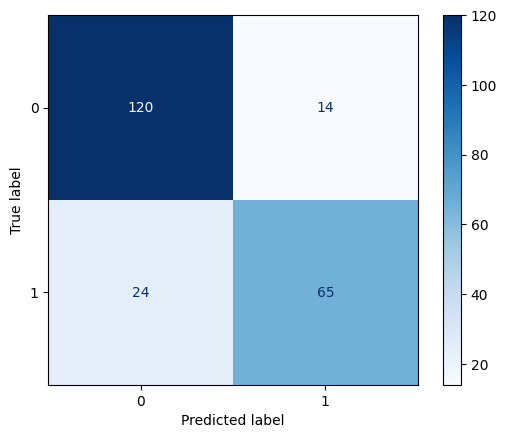

In [121]:
# Create and display confusion matrix
cm_voting = confusion_matrix(y_test, y_pred_test_voting)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_voting, cmap='Blues');